# A Quick Tour of Julia

## What is Julia

-   **Open source** programming language
-   **Easy** to use:
    -   dynamic typing
    -   excellent REPL
-   Designed for **performance**:
    -   detailed type system, dynamic dispatch
    -   function code is optimized and compiled using LLVM
-   Excellent for **scientific programming**:
    -   good number crunching performance
    -   comprehensive libraries
    -   avoids the dual language problem

# Working with Julia

## Installation and setup

-   Get binaries at [julialang.org](https://julialang.org/downloads/) or
    use your OS’s package manager
-   Use current stable version: `v1.8.5`
-   Recommended IDE: vscode with [julia
    extension](https://www.julia-vscode.org/)
-   Install package [`IJulia`](https://github.com/JuliaLang/IJulia.jl)
    for [Jupyter](https://jupyter.org/) integration

## The REPL

-   **r**ead - **e**valuate - **p**rint loop
-   Julia’s command line interface
-   built-in:
    -   help function (type `?`)
    -   package manager (type `]`)
    -   shell integration (type `;`)
-   intelligent multi-line editing
-   can enter unicode signs (e.g., operators) with LaTeX codes

### Task 1: Get Help

Use the built-in functions of the REPL to get the following information:

-   Which directory are you currently in?
-   What does the operator `∈` do?
-   What is the difference between `=`, `==`, `===`, and `≡`

## Installing packages

-   Access Julia’s built-in package manager from REPL: `]`

-   Add package [Images.jl](https://juliaimages.org/latest/):
    `] add Images`

-   Access an installed package:

    ``` julia
    using Images
    using FFTW: fft
    ```

-   See installed packages: `] st`

-   Outside REPL, package manager is available as module `Pkg`

In [1]:
using Pkg
Pkg.activate(".")
Pkg.add("Plots")

  Activating new project at `Z:\Studium\Master_SE\Semester_01\Computer_Vision_1\Assignment_01`
    Updating registry at `C:\Users\justi\.julia\registries\General.toml`
   Resolving package versions...
    Updating `Z:\Studium\Master_SE\Semester_01\Computer_Vision_1\Assignment_01\Project.toml`
  [91a5bcdd] + Plots v1.38.11
    Updating `Z:\Studium\Master_SE\Semester_01\Computer_Vision_1\Assignment_01\Manifest.toml`
  [d1d4a3ce] + BitFlags v0.1.7
  [d360d2e6] + ChainRulesCore v1.16.0
  [9e997f8a] + ChangesOfVariables v0.1.7
  [944b1d66] + CodecZlib v0.7.1
  [35d6a980] + ColorSchemes v3.21.0
  [3da002f7] + ColorTypes v0.11.4
  [c3611d14] + ColorVectorSpace v0.9.10
  [5ae59095] + Colors v0.12.10
  [34da2185] + Compat v4.6.1
  [f0e56b4a] + ConcurrentUtilities v2.1.1
  [d38c429a] + Contour v0.6.2
  [9a962f9c] + DataAPI v1.14.0
  [864edb3b] + DataStructures v0.18.13
  [ffbed154] + DocStringExtensions v0.9.3
  [c87230d0] + FFMPEG v0.4.1
  [53c48c17] + FixedPointNumbers v0.8.4
  [59287772] + Fo

## Setting up a project (i.e., your homework)

-   Julia package structure: 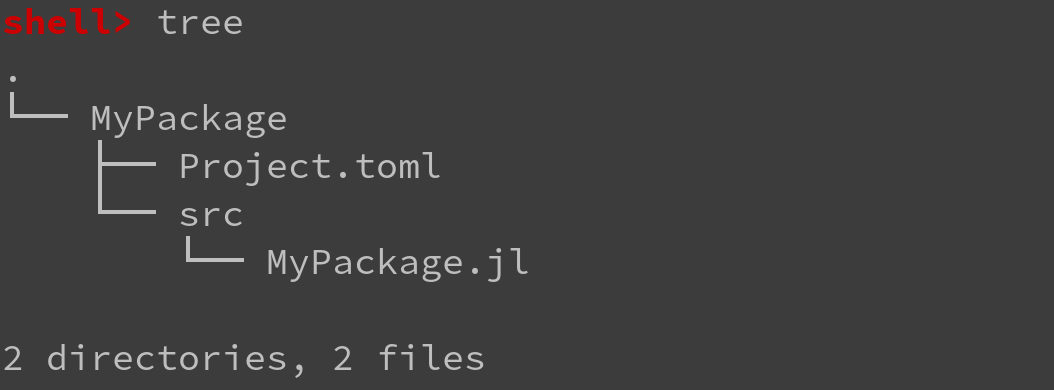
-   generate with `] generate MyPackage`
-   add files in `src` and `include` them in `MyPackage.jl`

## Using a project

-   tell Julia to use current folder as project folder: `] activate .`

In [2]:
using Pkg
Pkg.activate(".")

  Activating project at `Z:\Studium\Master_SE\Semester_01\Computer_Vision_1\Assignment_01`


-   tell Julia to install all dependencies: `] instantiate`

In [4]:
using Pkg
Pkg.instantiate()

### Task 2: Dependencies for homework

Create a folder “homework” on your computer. Activate is using the
package manager and install the following packages:

-   `Images`
-   `Plots`
-   `FFTW`
-   `IJulia`

# Language Elements and Syntax

## The basics

-   comments begin with `#`
-   assignment with `=`, variables have dynamic types

In [5]:
a = 3       # Integer
a = 3.0     # Float64
a = 'c'     # Char
a = "Hi"    # String

"Hi"

## Operators

### Math:

In [6]:
println(3 + 5) # addition
println(3 - 5) # subtraction
println(3 * 5) # multiplication
println(3 / 5) # division
println(3 ÷ 5) # integer division
println(3 ^ 5) # potentiation

8
-2
15
0.6
0
243


### Logic:

In [7]:
println(true && false)
println(true || false)

false
true


### Comparisons:

In [8]:
println(5 > 4)
println(6 ≥ 6)
println(5 ≠ 5)

true
true
false


## Control structures

-   Usual keywords for control structures: `if`, `for`, `while`
-   End of a construct is delimited by keyword `end`

In [9]:
a = "Hi there"
if length(a) > 7
    println("Too long")
elseif length(a) < 7
    println("Too short")
else
    println("Just right")
end

Too long


In [10]:
for i in 1:10
    println("i is $i")
end

i is 1
i is 2
i is 3
i is 4
i is 5
i is 6
i is 7
i is 8
i is 9
i is 10


## Vectors and Arrays

-   Array: **collection** of elements of the same type
-   For example:

In [11]:
row = [1 2 3 4 5]       # row vector (size 1x5, type Int)
col = [1.; 2.; 3.; 4.]  # column vector (size 4, type Float64)
mat = [1. 2.; 3. 4.]    # matrix (size 2x2, type Float64)

2×2 Matrix{Float64}:
 1.0  2.0
 3.0  4.0

-   Easy to build and manipulate:

In [12]:
z = zeros(3, 4)
o = ones(4, 2)
z * o   # matrix product

3×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0
 0.0  0.0

In [13]:
r = collect(1:10)

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

### Element access

-   Select elements with square brackets `[]`

In [14]:
x = randn(5, 4)
x[2, 2]

1.0255232041465259

-   Julia is **1-indexed** (unless you specify something else)
-   Select **slices** (sub-arrays) with `:`

In [15]:
x[2, :]

4-element Vector{Float64}:
 -0.8269101236485006
  1.0255232041465259
 -0.5541732526564512
 -1.725701984509056

-   Assignment to slices works as expected:

In [16]:
x[2, :] .= 0.
x

5×4 Matrix{Float64}:
 -1.47271    0.37912   -0.109436   1.79671
  0.0        0.0        0.0        0.0
  1.22183    0.827139   0.543833  -1.73401
 -0.26527    1.37047   -1.20393    0.127086
 -0.320162  -0.659025   0.848452   0.611418

### Vectorized operations

-   Any function or operator can be **broadcast** (applied element-wise)
    using `.` operator

In [17]:
x = randn(2, 3)
println(x .* x)
println(sin.(x))

[0.5450162918185172 1.2329512843605643 0.6950979592494116; 0.7620226014215487 0.03875283090412751 3.9056837154886894]
[0.6729961775185249 0.8958691009417377 0.7404403931285011; 0.7662208166592767 -0.19558838508467208 -0.918911605856336]


-   Can also be written as a for loop (loops are fast in Julia)
-   To vectorize a whole line, use `@.` macro

In [18]:
x = randn(2, 3)
y = rand(2, 3)
z = zeros(2, 3)
@. z = x + y - π

2×3 Matrix{Float64}:
 -2.04325  -2.91583  -2.9374
 -2.64297  -2.38676  -2.86472

## Visualization and Plotting

-   Plotting meta-package: `Plots.jl`
-   Several compatible backends:
    -   `GR` (standard)
    -   `PyPlot` (same as Python)
    -   `Plotly` (browser compatible)
    -   `UnicodePlots` (terminal compatible)
    -   `PGFPlotsX` (LaTeX-compatible output)
-   more on this in a separate tutorial

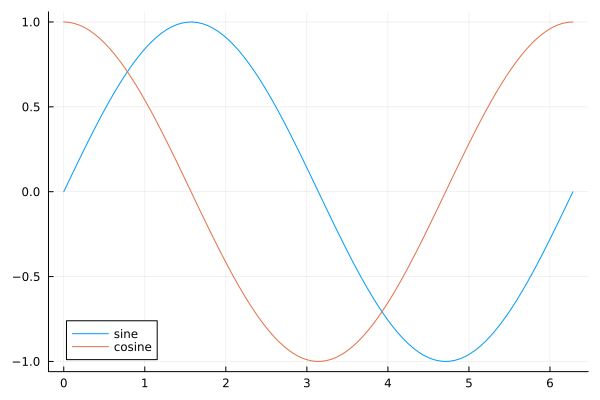

In [20]:
using Plots
x = LinRange(0, 2π, 100)
y = sin.(x)
plot(x, y, label="sine")
plot!(x, cos, label="cosine")

## Functions

-   Grouping code in functions is central to Julia
-   Functions are **compiled**, making them fast
-   Defined with `function` keyword:

In [23]:
using Statistics: mean

function rms(x)
    y = mean(x.^2)
    return(sqrt(y))
end

rms (generic function with 1 method)

In [22]:
rms(randn(5))

0.793219076735725

-   Shorter syntax for one-line functions:

In [24]:
rms2(x) = sqrt(mean(x.^2))

rms2 (generic function with 1 method)

-   Anonymous (lambda) functions:

In [25]:
x -> sqrt(mean(x.^2))

#1 (generic function with 1 method)

### Multiple dispatch

-   Functions are **generic**
-   Specific **method** is selected based on **types** of input
    arguments

In [26]:
cube(x) = x * x * x
println(cube(5))
println(cube(5.0))
println(cube("Hi"))

125
125.0
HiHiHi


-   This enables methods to be compiled to **efficient machine code**

In [27]:
@code_native cube(1)

	.text
	.file	"cube"
	.globl	julia_cube_6007                 # -- Begin function julia_cube_6007
	.p2align	4, 0x90
	.type	julia_cube_6007,@function
julia_cube_6007:                        # @julia_cube_6007
; ┌ @ In[26]:1 within `cube`
	.cfi_startproc
# %bb.0:                                # %top
	pushq	%rbp
	.cfi_def_cfa_offset 16
	.cfi_offset %rbp, -16
	movq	%rsp, %rbp
	.cfi_def_cfa_register %rbp
; │┌ @ operators.jl:591 within `*` @ int.jl:88
	movq	%rcx, %rax
	imulq	%rcx, %rax
	imulq	%rcx, %rax
; │└
	popq	%rbp
	retq
.Lfunc_end0:
	.size	julia_cube_6007, .Lfunc_end0-julia_cube_6007
	.cfi_endproc
; └
                                        # -- End function
	.section	".note.GNU-stack","",@progbits


-   Knowing your types is crucial

In [28]:
sqrt(-1.)

LoadError: DomainError with -1.0:
sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

In [29]:
sqrt(-1. + 0im)

0.0 + 1.0im

## Types

-   Julia’s type system:
    -   everything has a type
    -   a value has to be of a concrete type (a `struct`)
    -   concrete types can have abstract parent types
-   Inspect type of an object with `typeof`:

In [30]:
println(typeof(1.0))
println(typeof("Hi"))

Float64
String


-   Explore type hierarchy with `supertype`:

In [31]:
supertype(typeof(1.0))

AbstractFloat

### Make your own types

-   Abstract types:

In [32]:
abstract type MyType end;

-   Subtype relation expressed with `<:`
-   Type of something can be annotated with `::`
-   Concrete types with `struct` or `mutable struct`

In [33]:
struct Point <: MyType # Point is suptype of MyType
    x::Int # a Point has two fields, each of type Int
    y::Int
end

In [34]:
p = Point3(1, 2)
println(p.x)
p.x = 3  # only works for mutable struct 

LoadError: UndefVarError: Point3 not defined

### Task 3: A new function

Define a function `×` that computes the outer product of two vectors `a`
and `b`.

## Useful packages

-   Base and standard library ([see
    docs.julialang.org](https://docs.julialang.org/en/v1/))
-   [`Revise.jl`](https://github.com/timholy/Revise.jl) for reloading
    code while its running
-   [`Plots.jl`](https://docs.juliaplots.org/latest/) for visualization
-   [`Images.jl`](https://juliaimages.org/latest/) for image processing
-   [`DifferentialEquations.jl`](https://docs.juliadiffeq.org/latest/)
    for differential equations
-   [`GPUArrays.jl`](https://juliagpu.github.io/GPUArrays.jl/latest/)
    and related packages for graphics acceleration

## Where to get help

-   Julia [documentation](https://docs.julialang.org/en/v1/) and
    [resources](https://julialang.org/learning/) at
    [julialang.org](julialang.org)
-   Julia [cheat sheet](https://juliadocs.github.io/Julia-Cheat-Sheet/)
-   StackOverflow tag
    [`julia`](https://stackoverflow.com/questions/tagged/julia)
-   Community [channels](https://julialang.org/community/) on several
    media